In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [8]:
train = pd.read_csv('data/training_sample.csv')
train.shape

(455401, 25)

In [9]:
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [11]:
train.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

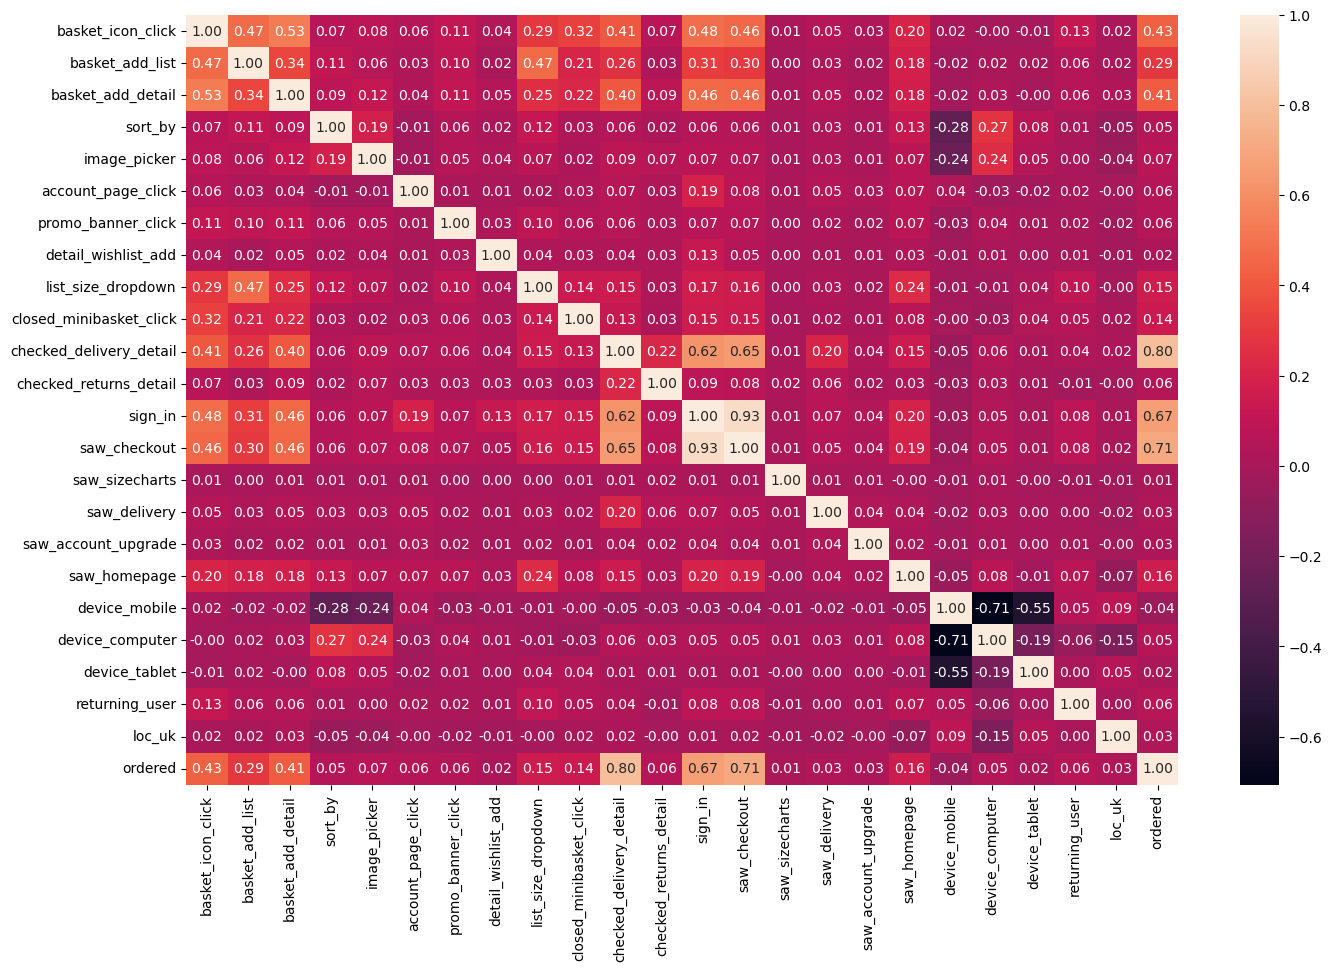

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(data=train.corr(), annot=True,fmt='.2f')
plt.show()

In [13]:
train.corr()['ordered'].sort_values()

device_mobile             -0.042907
saw_sizecharts             0.007548
device_tablet              0.016939
detail_wishlist_add        0.023516
saw_account_upgrade        0.025857
saw_delivery               0.031461
loc_uk                     0.031643
device_computer            0.049208
sort_by                    0.054636
promo_banner_click         0.056533
account_page_click         0.057279
checked_returns_detail     0.059484
returning_user             0.060295
image_picker               0.071492
closed_minibasket_click    0.140011
list_size_dropdown         0.154867
saw_homepage               0.157778
basket_add_list            0.287666
basket_add_detail          0.414420
basket_icon_click          0.428334
sign_in                    0.665556
saw_checkout               0.708986
checked_delivery_detail    0.798720
ordered                    1.000000
Name: ordered, dtype: float64

In [14]:
# seperate features and target
y = train['ordered']
X = train.drop(['ordered', 'UserID'], axis=1)

In [15]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Train shape: ', X_train.shape,y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (305118, 23) (305118,)
Test shape:  (150283, 23) (150283,)


In [16]:
# model
classifier = GaussianNB()
classifier_fit = classifier.fit(X_train, y_train)

# prediction
pred = classifier.predict(X_test)

# evaluation
conf = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('The confusion metrics:','\n',conf)
print('Accuracy: ',acc)
print('F1 Score: ',f1)

The confusion metrics: 
 [[142341   1696]
 [    73   6173]]
Accuracy:  0.9882288748561048
F1 Score:  0.8746723343960325


In [17]:
test_sample = pd.read_csv('data/testing_sample.csv')
print('Shape of the sample: ',test_sample.shape)

Shape of the sample:  (151655, 25)


In [18]:
# make a dataframe for the result with userid
userid = test_sample['UserID']
res = pd.DataFrame(userid)

test_sample = test_sample.drop(['UserID', 'ordered'], axis=1)
test_sample['propensity'] = classifier.predict_proba(test_sample)[:,1]

# the prediction dataframe
res['predictions'] = test_sample['propensity']
res.head()

,UserID,predictions
0,9d24-25k4-47889d24-25k4-494b-398124,0.0
1,7732-1k58-47887732-1k58-4475-679678,0.0
2,94k2-632j-471394k2-632j-4b4j-228160,0.0
3,jdd8-419d-4714jdd8-419d-4198-674376,0.0
4,7473-7595-47147473-7595-4757-227547,0.0
